In [1]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
# load ascii text and covert to lowercase
filename = "Datasets/wonderland.txt"
raw_text = open(filename, encoding='utf8').read() ## Read with UTF-8
raw_text = raw_text.lower()

In [3]:
# create mapping of unique chars to integers
chars = sorted(list(set(raw_text)))
char_to_int = dict((c, i) for i, c in enumerate(chars))

In [4]:
n_chars = len(raw_text)
n_vocab = len(chars)
print("Total Characters: ", n_chars)
print("Total Vocab: ", n_vocab)

Total Characters:  163816
Total Vocab:  61


In [18]:
# prepare the dataset of input to output pairs encoded as integers
seq_length = 100
dataX = []
dataY = []
for i in range(0, n_chars - seq_length, 1):
	seq_in = raw_text[i:i + seq_length]
	seq_out = raw_text[i + seq_length]
	dataX.append([char_to_int[char] for char in seq_in])
	dataY.append(char_to_int[seq_out])
n_patterns = len(dataX)
print("Total Patterns: ", n_patterns)

Total Patterns:  163716


In [24]:
# reshape X to be [samples, time steps, features]
X = numpy.reshape(dataX, (n_patterns, seq_length, 1))
# normalize
X = X / float(n_vocab)
# one hot encode the output variable
y = np_utils.to_categorical(dataY)

In [35]:
# define the LSTM model
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [36]:
# define the checkpoint
filepath="weights-improvement-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [37]:
model.fit(X, y, epochs=20, batch_size=128, callbacks=callbacks_list)

Epoch 1/20
143872/163716 [=========================>....] - ETA: 2:04 - loss: 3.0189

KeyboardInterrupt: 

In [41]:
from gensim.models import Word2Vec
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
print(words)
# access vector for one word
print(model['sentence'])

C:\Users\Georf\Anaconda3\envs\tensorflow\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


Word2Vec(vocab=14, size=100, alpha=0.025)
['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']
[ 4.2190473e-03  2.8916739e-03 -3.3644529e-03 -4.0635602e-03
  3.4584012e-03  1.4953233e-03  4.4037076e-03 -5.7150912e-04
 -7.3014831e-05 -9.6665684e-04  2.9216052e-04 -1.0813419e-03
 -4.2401203e-03  3.8785138e-04  3.3018368e-03 -4.3065865e-03
 -4.3658009e-03  3.2370887e-03 -3.0136600e-04  7.6873862e-04
 -3.5852578e-03 -3.6906372e-03  1.2786281e-03  3.7250703e-03
  8.1309016e-05 -4.2290374e-04  2.6687838e-03 -4.0762494e-03
 -2.1551510e-03 -4.1588759e-03  2.5416459e-03 -1.4724138e-03
  3.6505298e-04 -3.1959054e-03  1.6130039e-03 -1.1672237e-03
  4.6243332e-03  2.2212411e-03 -3.8432793e-03 -4.9392628e-03
  2.9555804e-03 -7.8886974e-04 -3.9869794e-03 -4.1774726e-03
  3.9137392e-03 -4.6589156e-03 -2.0256108e-03  3.6247585e-03
 -2.7902075e-03 -5.9602625e-04 -1.2109962e-03  4.9689878e-03
 -6.7127484e-04 -4.1127303e-03 -7.5582892e-0

C:\Users\Georf\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  app.launch_new_instance()


C:\Users\Georf\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


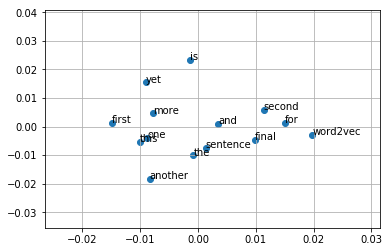

In [45]:
%matplotlib inline
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# fit a 2D PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.grid()
pyplot.show()

## Choosing the number of components

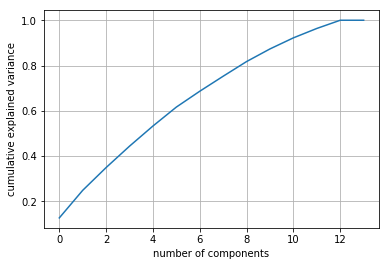

In [50]:
pca = PCA().fit(X)
pyplot.plot(numpy.cumsum(pca.explained_variance_ratio_))
pyplot.xlabel('number of components')
pyplot.ylabel('cumulative explained variance')
pyplot.grid()